# Imports

In [1]:
import pandas as pd

#Read the dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/IBMR/ML/Supervised/Classification/NaiveBayes/titanic.csv')

In [3]:
df.head(10)

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,"Moran, Mr. James",3,male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,"McCarthy, Mr. Timothy J",1,male,54.0,0,0,17463,51.8625,E46,S,0
7,8,"Palsson, Master. Gosta Leonard",3,male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",3,female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",2,female,14.0,1,0,237736,30.0708,NaN,C,1


Some of the features are irrelvant from the perspective of defining weather or not the passenger survived. Hence while preparing the data for machine learning we can remove these features

In [4]:
df.columns

Index(['PassengerId', 'Name', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [5]:
df.drop(['PassengerId', 'Name','SibSp', 'Parch','Ticket','Cabin', 'Embarked'], axis = 'columns', inplace = True)

In [8]:
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


Dividing the data in features and  Labels

In [9]:
X = df.drop('Survived', axis='columns')
y = df['Survived']

In [10]:
X

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [11]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

The features dataframe consists of Sex column which has categorical data. For creating Machine Learning model we have to make sure all features have neumerical datatype.

Hence we have to convert Sex column into Nuemerical datatype either using pandas get dummies method, or Sklearns OneHotEncoder Method

In [12]:
dummies = pd.get_dummies(data=X['Sex'])

In [13]:
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


We will now append dummies dataframe to X dataframe using pandas concat function

In [16]:
X = pd.concat([X,dummies], axis=1)

Drop Sex column

In [18]:
X.drop('Sex', axis = 'columns', inplace=True)

In [19]:
X.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


# Data preprocessing

Identify if there are missing values in the dataset

In [21]:
X.isna().any()

Pclass    False
Age        True
Fare      False
female    False
male      False
dtype: bool

Age feature has missing values

You can handle NaN (missing) values on case to case basis. Here you can replace missing values with Mean of that column.

Alternatively you can drop the rows containig missing values

Here we will fill missing values with mean of that column

In [22]:
X['Age'].fillna(X['Age'].mean(), inplace=True)

Verify if there are any missing values in the dataframe  

In [29]:
X.isna().any()

Pclass    False
Age       False
Fare      False
female    False
male      False
dtype: bool

count of missing values in each feature of the dataframe

In [31]:
X.isna().sum()

Pclass    0
Age       0
Fare      0
female    0
male      0
dtype: int64

# Splitting the dataset into Training and Testing set

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [34]:
len(X_train)

712

In [35]:
len(X_test)

179

# Create a Naive Base ML model

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
model = GaussianNB()

#Train the model

In [38]:
model.fit(X_train, y_train)

GaussianNB()

#Test the model

In [40]:
model.predict(X_test)

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0])

#Accuracy of the model

In [39]:
model.score(X_test,y_test)

0.7877094972067039

#Evaluate Model Performance using Confusion Matrix

In [43]:
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix

In [44]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[94, 20],
       [18, 47]])

visualise confusion matrix using seaborn

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(95.72222222222221, 0.5, 'Truth')

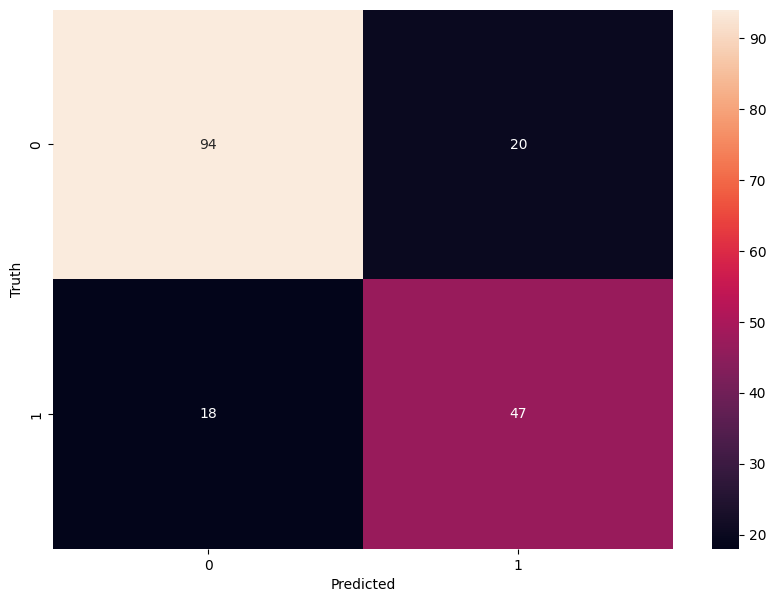

In [53]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


#Explore the probability of the outcomes

In [55]:
model.predict_proba(X_test[:10])

array([[0.56641105, 0.43358895],
       [0.98839771, 0.01160229],
       [0.97713427, 0.02286573],
       [0.02271712, 0.97728288],
       [0.04961249, 0.95038751],
       [0.98897129, 0.01102871],
       [0.01477983, 0.98522017],
       [0.98977397, 0.01022603],
       [0.01960635, 0.98039365],
       [0.01991008, 0.98008992]])